## Data Understanding
### Read the Car Pricing csv Data file.
### Check the Data columns and Description of the Data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Read the CarPrice_Assignment csv file
carPricing_df = pd.read_csv('CarPrice_Assignment.csv')

In [2]:
# From the info we notice that there are no missing values present in the data set.
# We see many non numeric columns which need to be analysed and converted to numeric type
# so that they can be fed to the model.
carPricing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [3]:
carPricing_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# From the data description we see that mean and median for all the columns are close.
# So this shows that there is no extreme outliers present (we have small data set of 205 rows)
# which can cause problems for modelling.
# Further min-max Scaling will help us normalize these outlier values.

carPricing_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000



### Visualize the data set

In [5]:
# Get the company Name from the CarName Column. CarName is not much of importance so drop the column,
# while sustaining the company name which can effect our model.
carPricing_df['companyName'] = carPricing_df['CarName'].apply (lambda x: x.split(' ', 1)[0])
carPricing_df = carPricing_df.drop (columns = 'CarName', axis = 1)

# Sort the companyName column to check for any data descripencies.
carPricing_df['companyName'].value_counts().to_frame().reset_index().sort_values(by = 'index')

,index,companyName
24,Nissan,1
18,alfa-romero,3
12,audi,7
10,bmw,8
11,buick,8
19,chevrolet,3
9,dodge,9
3,honda,13
15,isuzu,4
17,jaguar,3


In [6]:
# We see that there are spelling errors in company Name, rectify those.
carPricing_df['companyName'] = carPricing_df['companyName'].replace ( {'maxda' : 'mazda', \
                                    'porcshce' : 'porsche', 'toyouta' : 'toyota', \
                                        'vokswagen' : 'volkswagen', 'vw' : 'volkswagen'} )

carPricing_df['companyName'].value_counts().to_frame().reset_index().sort_values(by = 'index')

,index,companyName
21,Nissan,1
19,alfa-romero,3
13,audi,7
11,bmw,8
10,buick,8
18,chevrolet,3
9,dodge,9
3,honda,13
16,isuzu,4
17,jaguar,3


In [7]:
# Car id is the Identity of the cars, remove it as values can mislead the model.
carPricing_df = carPricing_df.drop (columns = 'car_ID')

In [8]:
# Get the Continous and Categorical columns in a seperate list
continousColumns = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',\
                     'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',\
                        'peakrpm', 'citympg', 'highwaympg', 'price']


categoricalColumns = [col for col in carPricing_df.columns.tolist() if col not in continousColumns]

# Remove price as it is our target variable.
continousColumns.remove('price')

print ("Categorical Columns are: {0}\n".format(categoricalColumns))

Categorical Columns are: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'companyName']



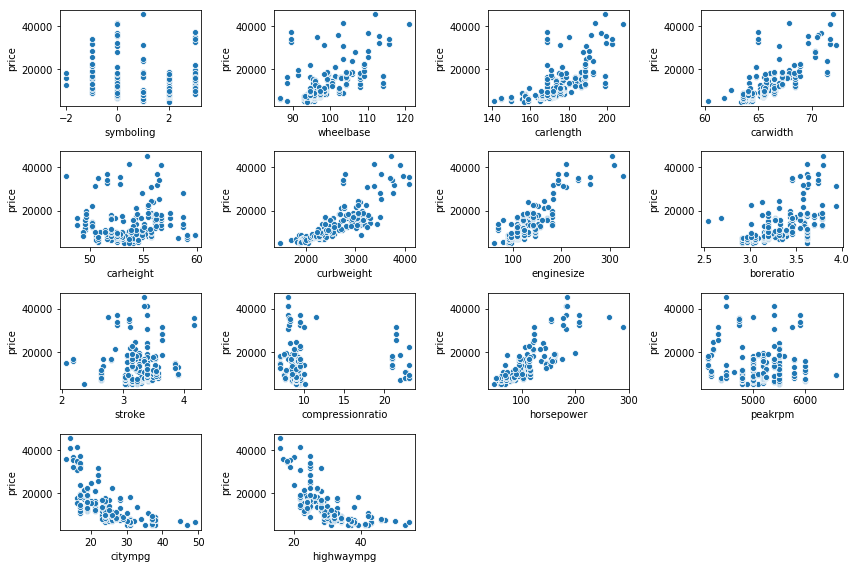

In [9]:
# Plot a scatter plot for continous column against price(target variable)
# and the Categorical variables using box plot.
# From the graph we see that there is visual linear relationship between price and many continous variables.
# This shows linear regression modelling can be done on the data set.
plt.figure(figsize=(12,8))

for col in continousColumns:
    plt.subplot(4,4, continousColumns.index(col) + 1)
    sns.scatterplot(x = carPricing_df[col], y = carPricing_df['price'])
    
plt.tight_layout()
plt.show()

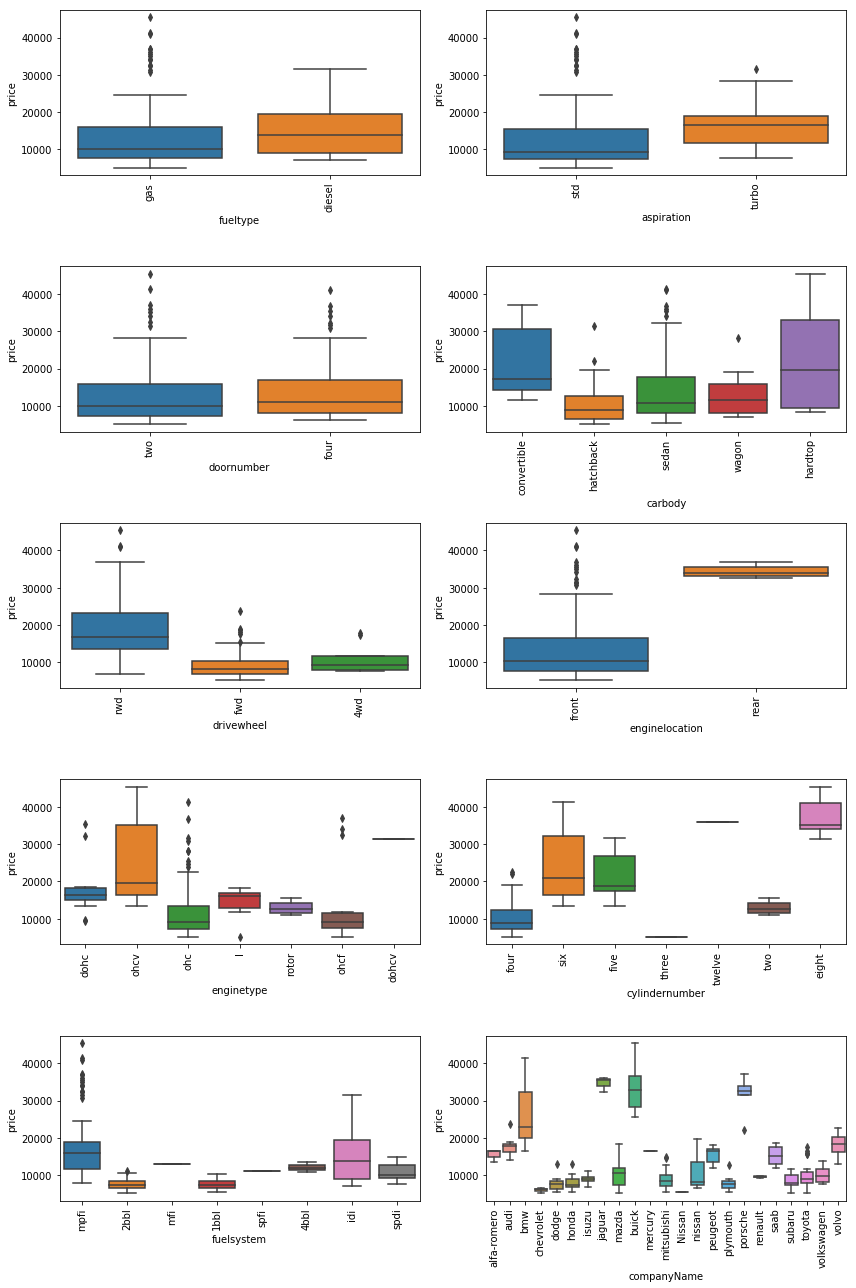

In [10]:
# Plot a box plot for categorical column against price.
plt.figure(figsize=(12,18))

for col in categoricalColumns:
    plt.subplot(5,2, categoricalColumns.index(col)+1)
    sns.boxplot(x = carPricing_df[col], y = carPricing_df['price'])
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

## Prepare Data for Modelling

### Encoding of Categorical Columns
### Splitting between training and test sets
### Scaling of Data Set


In [11]:
# First Encode the nominal columns where order does not matter using one hot encoding.
nominalList = ['enginelocation', 'aspiration', 'fueltype', 'carbody', 'drivewheel',\
               'enginetype' , 'fuelsystem', 'companyName']

# Since, to represent a Categorical variable with n levels we need n-1 dummy variables,
# Make sure to remove a dummy variable from Dummy Data frame using drop first.
dummy_df = pd.get_dummies(carPricing_df[nominalList],drop_first = True)

dummy_df.head()

,enginelocation_rear,aspiration_turbo,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,...,companyName_nissan,companyName_peugeot,companyName_plymouth,companyName_porsche,companyName_renault,companyName_saab,companyName_subaru,companyName_toyota,companyName_volkswagen,companyName_volvo
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Concat the Dummy Data frame with our Original Data frame.
carPricing_df = pd.concat([carPricing_df, dummy_df], axis = 1)
carPricing_df = carPricing_df.drop (columns = nominalList, axis = 1)

carPricing_df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,companyName_nissan,companyName_peugeot,companyName_plymouth,companyName_porsche,companyName_renault,companyName_saab,companyName_subaru,companyName_toyota,companyName_volkswagen,companyName_volvo
0,3,two,88.6,168.8,64.1,48.8,2548,four,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,3,two,88.6,168.8,64.1,48.8,2548,four,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,1,two,94.5,171.2,65.5,52.4,2823,six,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,2,four,99.8,176.6,66.2,54.3,2337,four,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,2,four,99.4,176.6,66.4,54.3,2824,five,136,3.19,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# We have two ordinal columns in our data set where order matters, convert them to numeric type.
carPricing_df['doornumber'] = carPricing_df['doornumber'].apply(lambda x: 4 if x == 'four' else 2)
carPricing_df['cylindernumber'] = carPricing_df['cylindernumber'].\
                replace( {'four': 4, 'six': 6, 'five': 5, 'twelve': 12,\
                          'eight': 8, 'three' : 3, 'two': 2 } )

In [14]:
# We have total of 61 columns which are of numeric type and no missing values.
carPricing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 61 columns):
symboling                  205 non-null int64
doornumber                 205 non-null int64
wheelbase                  205 non-null float64
carlength                  205 non-null float64
carwidth                   205 non-null float64
carheight                  205 non-null float64
curbweight                 205 non-null int64
cylindernumber             205 non-null int64
enginesize                 205 non-null int64
boreratio                  205 non-null float64
stroke                     205 non-null float64
compressionratio           205 non-null float64
horsepower                 205 non-null int64
peakrpm                    205 non-null int64
citympg                    205 non-null int64
highwaympg                 205 non-null int64
price                      205 non-null float64
enginelocation_rear        205 non-null uint8
aspiration_turbo           205 non-null uint8
fuelt

In [15]:
# Create our Train and Test Data Set now with 70:30 split.
carPricing_train_df, carPricing_test_df = \
            train_test_split(carPricing_df, train_size = 0.7, random_state = 100)

print (carPricing_train_df.shape)
print (carPricing_test_df.shape)


(143, 61)
(62, 61)


In [16]:
# Doing normalization: (min-Max) scaling, we will do scaling on the numeric variables including target variable
# (not the Ordinal or One hot encoded/Nominal variables).
continousColumns.append('price')

scaler = MinMaxScaler()
carPricing_train_df.loc[:,continousColumns] = scaler.fit_transform(carPricing_train_df.loc[:,continousColumns])

carPricing_train_df[continousColumns].describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310
std,0.239200,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298
50%,0.600000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343
75%,0.600000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.313479
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Start with modelling of data

In [17]:
# Get our target(y) and predictor(X) train variables.
y_train = carPricing_train_df.pop('price')
X_train = carPricing_train_df

In [18]:
X_train.shape

(143, 60)

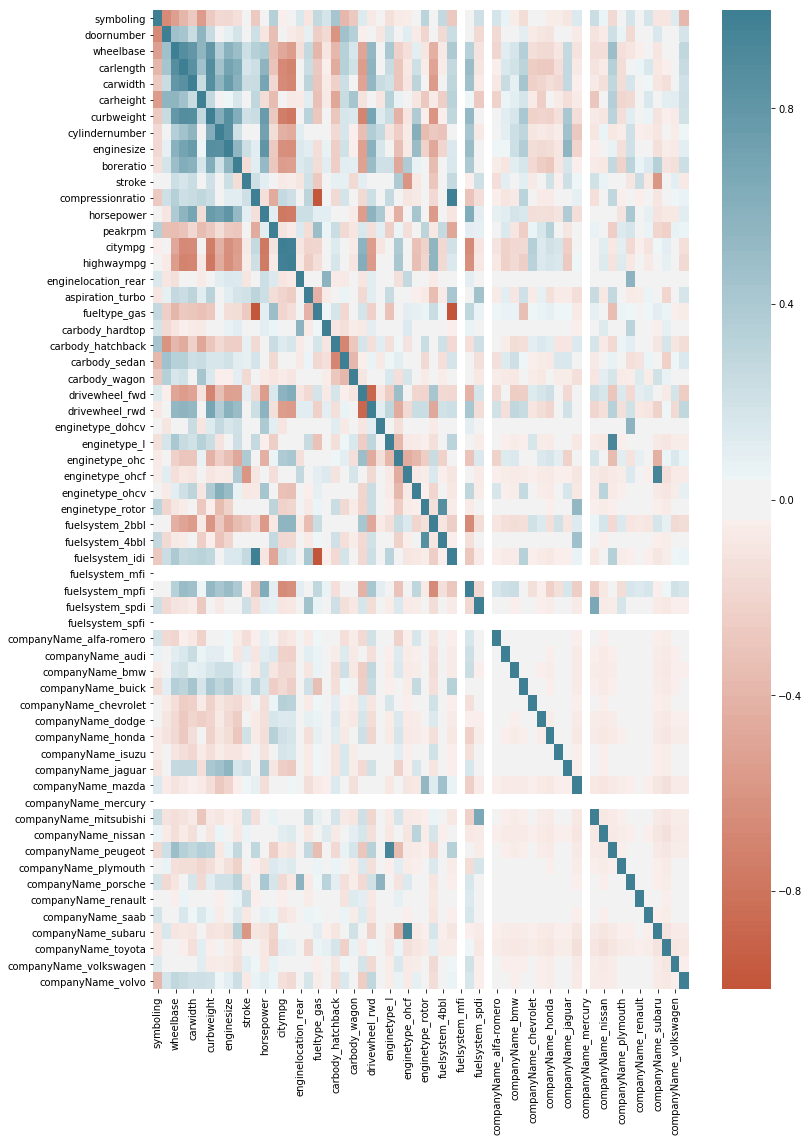

In [19]:
# Below Heat Map of Correlation shows how the variables are related to each other.
# We will cater multiColinearity while doing the modelling using VIF values.
plt.figure(figsize=(12,18))

sns.heatmap(carPricing_train_df.corr(),cmap=sns.diverging_palette(20, 220, n=200))

### Use RFE to get the initial model with 30 predictor variables and then move step by step 
### elminating the variables one at a time using P-Value and VIF
### and creating the model again until desired model is received.

### Below are the steps to be followed while removing a variable:

### 1.) Low P-Value, Low VIF : Keep the variable.
### 2.) High P-Value, High VIF: Remove this variable.
### 3.) High P-Value, Low VIF : Remove this variable first.
### 4.) Low P-Value, High VIF: Remove this variable afterwards.

In [20]:
# Generic function to get the Linear regression model and VIF values for 
# given X(Predictor) and y(Target) variables.
def getModelAndVif(X, y):
    X_sm = sm.add_constant(X)
    
    lm = sm.OLS(y, X_sm).fit()
    
    vif = pd.DataFrame()

    vif['features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif = vif.sort_values(by = 'VIF', ascending = False)
    
    return (lm,vif)

In [21]:
# Use RFE to get the best 30 element model to start with.
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE (lm, 30)
rfe = rfe.fit(X_train, y_train)

print (X_train.columns)

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'enginelocation_rear', 'aspiration_turbo', 'fueltype_gas',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'companyName_alfa-romero',
       'companyName_audi', 'companyName_bmw', 'companyName_buick',
       'companyName_chevrolet', 'companyName_dodge', 'companyName_honda',
       'companyName_isuzu', 'companyName_jaguar', 'companyName_mazda',
       'companyName_mercury', 'companyName_mitsubishi', 'compa

In [22]:
col = X_train.columns[rfe.support_]
print ("RFE selected columns: {0}".format(col))

RFE selected columns: Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'enginelocation_rear', 'aspiration_turbo', 'fueltype_gas',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_rotor',
       'fuelsystem_idi', 'companyName_bmw', 'companyName_buick',
       'companyName_dodge', 'companyName_honda', 'companyName_mitsubishi',
       'companyName_peugeot', 'companyName_plymouth', 'companyName_porsche',
       'companyName_saab', 'companyName_volvo'],
      dtype='object')


In [23]:
X_train = X_train[col]

In [24]:
# Model 1
(lm,vif) = getModelAndVif(X_train, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     92.49
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.06e-65
Time:                        21:25:26   Log-Likelihood:                 246.34
No. Observations:                 143   AIC:                            -432.7
Df Residuals:                     113   BIC:                            -343.8
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3226      0.092      3.509      0.001       0.140       0.505
wheelbase                  0.0654      0.062      1.054      0.294      -0.058       0.188
carlength                 -0.0474      0.081     -0.587      0.559      -0.207       0.113
carwidth                   0.3087      0.069      4.445      0.000       0.171       0.446
carheight                 -0.1099      0.040     -2.768      0.007      -0.189      -0.031
curbweight                 0.2792      0.103      2.711      0.008       0.075       0.483
cylindernumber            -0.0848      0.020     -4.150      0.000      -0.125      -0.044
enginesize                 1.5923      0.232      6.874      0.000       1.133       2.051
boreratio                 -0.3799      0.066     -5.779      0.000      -0.510      -0.250
stroke                    -0.2933      0.059     -4.989      0.000      -0.410      -0.177
compressionratio          -0.3109      0.198     -1.572      0.119      -0.703       0.081
horsepower                -0.3168      0.123     -2.578      0.011      -0.560      -0.073
peakrpm                    0.1542      0.038      4.075      0.000       0.079       0.229
citympg                    0.0443      0.066      0.670      0.504      -0.087       0.175
enginelocation_rear        0.3256      0.078      4.200      0.000       0.172       0.479
aspiration_turbo           0.0790      0.023      3.409      0.001       0.033       0.125
fueltype_gas               0.0363      0.069      0.523      0.602      -0.101       0.174
enginetype_dohcv           0.3067      0.095      3.212      0.002       0.118       0.496
enginetype_l               0.0858      0.055      1.563      0.121      -0.023       0.195
enginetype_rotor           0.1010      0.046      2.189      0.031       0.010       0.192
fuelsystem_idi             0.2863      0.117      2.452      0.016       0.055       0.518
companyName_bmw            0.2842      0.024     12.005      0.000       0.237       0.331
companyName_buick          0.0856      0.033      2.570      0.011       0.020       0.152
companyName_dodge         -0.0820      0.026     -3.152      0.002      -0.133      -0.030
companyName_honda         -0.0459      0.022     -2.089      0.039      -0.089      -0.002
companyName_mitsubishi    -0.1169      0.022     -5.284      0.000      -0.161      -0.073
companyName_peugeot       -0.1697      0.063     -2.684      0.008      -0.295      -0.044
companyName_plymouth      -0.0836      0.029     -2.849      0.005      -0.142      -0.025
companyName_porsche        0.1858      0.059      3.151      0.002       0.069       0.303
companyName_saab           0.1194      0.034      3.463      0.001       0.051       0.188
companyName_volvo          0.0589      0.027      2.202      0.030       0.006  

In [25]:
vif

,features,VIF
15,fueltype_gas,708.604954
19,fuelsystem_idi,216.495329
9,compressionratio,132.295700
6,enginesize,77.076543
5,cylindernumber,33.668137
4,curbweight,28.457304
10,horsepower,24.861299
1,carlength,16.432006
25,companyName_peugeot,12.779957
7,boreratio,11.140082


In [26]:
X_train = X_train.drop(columns = 'fueltype_gas', axis = 1)

In [27]:
# Model 2
(lm,vif) = getModelAndVif(X_train, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     92.49
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.06e-65
Time:                        21:25:26   Log-Likelihood:                 246.34
No. Observations:                 143   AIC:                            -432.7
Df Residuals:                     113   BIC:                            -343.8
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3588      0.113      3.161      0.002       0.134       0.584
wheelbase                  0.0654      0.062      1.054      0.294      -0.058       0.188
carlength                 -0.0474      0.081     -0.587      0.559      -0.207       0.113
carwidth                   0.3087      0.069      4.445      0.000       0.171       0.446
carheight                 -0.1099      0.040     -2.768      0.007      -0.189      -0.031
curbweight                 0.2792      0.103      2.711      0.008       0.075       0.483
cylindernumber            -0.0848      0.020     -4.150      0.000      -0.125      -0.044
enginesize                 1.5923      0.232      6.874      0.000       1.133       2.051
boreratio                 -0.3799      0.066     -5.779      0.000      -0.510      -0.250
stroke                    -0.2933      0.059     -4.989      0.000      -0.410      -0.177
compressionratio          -0.3109      0.198     -1.572      0.119      -0.703       0.081
horsepower                -0.3168      0.123     -2.578      0.011      -0.560      -0.073
peakrpm                    0.1542      0.038      4.075      0.000       0.079       0.229
citympg                    0.0443      0.066      0.670      0.504      -0.087       0.175
enginelocation_rear        0.3256      0.078      4.200      0.000       0.172       0.479
aspiration_turbo           0.0790      0.023      3.409      0.001       0.033       0.125
enginetype_dohcv           0.3067      0.095      3.212      0.002       0.118       0.496
enginetype_l               0.0858      0.055      1.563      0.121      -0.023       0.195
enginetype_rotor           0.1010      0.046      2.189      0.031       0.010       0.192
fuelsystem_idi             0.2500      0.169      1.483      0.141      -0.084       0.584
companyName_bmw            0.2842      0.024     12.005      0.000       0.237       0.331
companyName_buick          0.0856      0.033      2.570      0.011       0.020       0.152
companyName_dodge         -0.0820      0.026     -3.152      0.002      -0.133      -0.030
companyName_honda         -0.0459      0.022     -2.089      0.039      -0.089      -0.002
companyName_mitsubishi    -0.1169      0.022     -5.284      0.000      -0.161      -0.073
companyName_peugeot       -0.1697      0.063     -2.684      0.008      -0.295      -0.044
companyName_plymouth      -0.0836      0.029     -2.849      0.005      -0.142      -0.025
companyName_porsche        0.1858      0.059      3.151      0.002       0.069       0.303
companyName_saab           0.1194      0.034      3.463      0.001       0.051       0.188
companyName_volvo          0.0589      0.027      2.202      0.030       0.006       0.112
==============================================================================
O

In [28]:
vif

,features,VIF
9,compressionratio,216.443868
18,fuelsystem_idi,155.959526
5,cylindernumber,146.946530
1,carlength,125.300829
6,enginesize,118.571056
4,curbweight,106.309684
10,horsepower,72.071845
2,carwidth,71.212081
0,wheelbase,49.198717
12,citympg,30.362126


In [29]:
X_train = X_train.drop (columns = 'carlength', axis = 1)

In [30]:
# Model 3
(lm,vif) = getModelAndVif(X_train, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     96.33
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.27e-66
Time:                        21:25:26   Log-Likelihood:                 246.12
No. Observations:                 143   AIC:                            -434.2
Df Residuals:                     114   BIC:                            -348.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3580      0.113      3.163      0.002       0.134       0.582
wheelbase                  0.0518      0.057      0.902      0.369      -0.062       0.166
carwidth                   0.2932      0.064      4.580      0.000       0.166       0.420
carheight                 -0.1130      0.039     -2.879      0.005      -0.191      -0.035
curbweight                 0.2612      0.098      2.664      0.009       0.067       0.455
cylindernumber            -0.0852      0.020     -4.180      0.000      -0.126      -0.045
enginesize                 1.6115      0.229      7.048      0.000       1.159       2.064
boreratio                 -0.3876      0.064     -6.034      0.000      -0.515      -0.260
stroke                    -0.2989      0.058     -5.167      0.000      -0.414      -0.184
compressionratio          -0.3328      0.194     -1.717      0.089      -0.717       0.051
horsepower                -0.3193      0.122     -2.607      0.010      -0.562      -0.077
peakrpm                    0.1540      0.038      4.082      0.000       0.079       0.229
citympg                    0.0539      0.064      0.845      0.400      -0.073       0.180
enginelocation_rear        0.3162      0.076      4.181      0.000       0.166       0.466
aspiration_turbo           0.0814      0.023      3.576      0.001       0.036       0.126
enginetype_dohcv           0.3129      0.095      3.308      0.001       0.126       0.500
enginetype_l               0.0881      0.055      1.613      0.110      -0.020       0.196
enginetype_rotor           0.1082      0.044      2.441      0.016       0.020       0.196
fuelsystem_idi             0.2666      0.166      1.609      0.110      -0.062       0.595
companyName_bmw            0.2826      0.023     12.051      0.000       0.236       0.329
companyName_buick          0.0889      0.033      2.720      0.008       0.024       0.154
companyName_dodge         -0.0797      0.026     -3.108      0.002      -0.130      -0.029
companyName_honda         -0.0419      0.021     -2.011      0.047      -0.083      -0.001
companyName_mitsubishi    -0.1172      0.022     -5.315      0.000      -0.161      -0.074
companyName_peugeot       -0.1708      0.063     -2.710      0.008      -0.296      -0.046
companyName_plymouth      -0.0844      0.029     -2.888      0.005      -0.142      -0.027
companyName_porsche        0.1969      0.056      3.538      0.001       0.087       0.307
companyName_saab           0.1160      0.034      3.423      0.001       0.049       0.183
companyName_volvo          0.0600      0.027      2.252      0.026       0.007       0.113
==============================================================================
Omnibus:                       34.881   Durbin-Watson:                   1.785
Prob(Omnibus)

In [31]:
vif

,features,VIF
8,compressionratio,208.812737
17,fuelsystem_idi,151.589413
4,cylindernumber,146.181617
5,enginesize,112.513364
3,curbweight,93.774433
9,horsepower,71.985411
1,carwidth,60.771459
0,wheelbase,42.350442
2,carheight,28.574258
11,citympg,27.979762


In [32]:
X_train = X_train.drop(columns = 'citympg', axis = 1)

In [33]:
# Model 4
(lm,vif) = getModelAndVif(X_train, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     100.1
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.78e-67
Time:                        21:25:26   Log-Likelihood:                 245.67
No. Observations:                 143   AIC:                            -435.3
Df Residuals:                     115   BIC:                            -352.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4070      0.097      4.195      0.000       0.215       0.599
wheelbase                  0.0502      0.057      0.875      0.383      -0.063       0.164
carwidth                   0.2928      0.064      4.580      0.000       0.166       0.419
carheight                 -0.1117      0.039     -2.852      0.005      -0.189      -0.034
curbweight                 0.2233      0.087      2.565      0.012       0.051       0.396
cylindernumber            -0.0894      0.020     -4.530      0.000      -0.128      -0.050
enginesize                 1.6645      0.220      7.579      0.000       1.229       2.099
boreratio                 -0.4024      0.062     -6.519      0.000      -0.525      -0.280
stroke                    -0.3065      0.057     -5.371      0.000      -0.420      -0.193
compressionratio          -0.2774      0.182     -1.523      0.130      -0.638       0.083
horsepower                -0.3354      0.121     -2.776      0.006      -0.575      -0.096
peakrpm                    0.1499      0.037      4.011      0.000       0.076       0.224
enginelocation_rear        0.3139      0.075      4.159      0.000       0.164       0.463
aspiration_turbo           0.0834      0.023      3.688      0.000       0.039       0.128
enginetype_dohcv           0.3337      0.091      3.659      0.000       0.153       0.514
enginetype_l               0.1010      0.052      1.929      0.056      -0.003       0.205
enginetype_rotor           0.0956      0.042      2.294      0.024       0.013       0.178
fuelsystem_idi             0.2304      0.160      1.441      0.152      -0.086       0.547
companyName_bmw            0.2818      0.023     12.041      0.000       0.235       0.328
companyName_buick          0.0905      0.033      2.774      0.006       0.026       0.155
companyName_dodge         -0.0801      0.026     -3.130      0.002      -0.131      -0.029
companyName_honda         -0.0406      0.021     -1.954      0.053      -0.082       0.001
companyName_mitsubishi    -0.1167      0.022     -5.300      0.000      -0.160      -0.073
companyName_peugeot       -0.1800      0.062     -2.904      0.004      -0.303      -0.057
companyName_plymouth      -0.0855      0.029     -2.930      0.004      -0.143      -0.028
companyName_porsche        0.1935      0.055      3.490      0.001       0.084       0.303
companyName_saab           0.1139      0.034      3.373      0.001       0.047       0.181
companyName_volvo          0.0609      0.027      2.292      0.024       0.008       0.114
==============================================================================
Omnibus:                       35.760   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.513
Skew:                    

In [34]:
vif

,features,VIF
8,compressionratio,184.906420
16,fuelsystem_idi,140.360509
4,cylindernumber,120.275099
5,enginesize,108.026326
3,curbweight,86.603953
9,horsepower,69.459398
1,carwidth,60.405431
0,wheelbase,42.314785
2,carheight,28.551685
7,stroke,20.841252


In [35]:
X_train = X_train.drop(columns = 'wheelbase', axis = 1)

In [36]:
# Model 5
(lm,vif) = getModelAndVif(X_train, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     104.2
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           2.51e-68
Time:                        21:25:26   Log-Likelihood:                 245.20
No. Observations:                 143   AIC:                            -436.4
Df Residuals:                     116   BIC:                            -356.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4071      0.097      4.200      0.000       0.215       0.599
carwidth                   0.3218      0.055      5.889      0.000       0.214       0.430
carheight                 -0.0984      0.036     -2.728      0.007      -0.170      -0.027
curbweight                 0.2370      0.086      2.771      0.007       0.068       0.406
cylindernumber            -0.0916      0.020     -4.686      0.000      -0.130      -0.053
enginesize                 1.6825      0.218      7.703      0.000       1.250       2.115
boreratio                 -0.4058      0.062     -6.595      0.000      -0.528      -0.284
stroke                    -0.3060      0.057     -5.366      0.000      -0.419      -0.193
compressionratio          -0.2571      0.180     -1.425      0.157      -0.614       0.100
horsepower                -0.3406      0.121     -2.825      0.006      -0.579      -0.102
peakrpm                    0.1500      0.037      4.018      0.000       0.076       0.224
enginelocation_rear        0.3141      0.075      4.166      0.000       0.165       0.464
aspiration_turbo           0.0823      0.023      3.650      0.000       0.038       0.127
enginetype_dohcv           0.3352      0.091      3.680      0.000       0.155       0.516
enginetype_l               0.1016      0.052      1.942      0.055      -0.002       0.205
enginetype_rotor           0.0939      0.042      2.258      0.026       0.012       0.176
fuelsystem_idi             0.2135      0.159      1.347      0.181      -0.101       0.528
companyName_bmw            0.2863      0.023     12.548      0.000       0.241       0.332
companyName_buick          0.0905      0.033      2.778      0.006       0.026       0.155
companyName_dodge         -0.0765      0.025     -3.032      0.003      -0.127      -0.027
companyName_honda         -0.0419      0.021     -2.027      0.045      -0.083      -0.001
companyName_mitsubishi    -0.1152      0.022     -5.251      0.000      -0.159      -0.072
companyName_peugeot       -0.1728      0.061     -2.815      0.006      -0.294      -0.051
companyName_plymouth      -0.0827      0.029     -2.855      0.005      -0.140      -0.025
companyName_porsche        0.1829      0.054      3.384      0.001       0.076       0.290
companyName_saab           0.1102      0.033      3.293      0.001       0.044       0.176
companyName_volvo          0.0653      0.026      2.505      0.014       0.014       0.117
==============================================================================
Omnibus:                       34.941   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.062
Skew:                           0.840   Prob(JB):                     5.15e-27
Kurtosis:                       7.183

In [37]:
vif

,features,VIF
7,compressionratio,181.892195
15,fuelsystem_idi,138.301083
3,cylindernumber,112.188170
4,enginesize,105.921352
2,curbweight,83.437954
8,horsepower,69.285625
0,carwidth,43.894367
1,carheight,24.282312
6,stroke,20.831927
9,peakrpm,16.564127


In [38]:
X_train = X_train.drop(columns = 'fuelsystem_idi', axis = 1)

In [39]:
# Model 6
(lm,vif) = getModelAndVif(X_train, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     107.5
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           5.84e-69
Time:                        21:25:26   Log-Likelihood:                 244.09
No. Observations:                 143   AIC:                            -436.2
Df Residuals:                     117   BIC:                            -359.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3939      0.097      4.071      0.000       0.202       0.585
carwidth                   0.3205      0.055      5.847      0.000       0.212       0.429
carheight                 -0.0916      0.036     -2.556      0.012      -0.163      -0.021
curbweight                 0.2438      0.086      2.846      0.005       0.074       0.414
cylindernumber            -0.0986      0.019     -5.213      0.000      -0.136      -0.061
enginesize                 1.7103      0.218      7.838      0.000       1.278       2.142
boreratio                 -0.4102      0.062     -6.652      0.000      -0.532      -0.288
stroke                    -0.2998      0.057     -5.257      0.000      -0.413      -0.187
compressionratio          -0.0169      0.027     -0.624      0.534      -0.070       0.037
horsepower                -0.3258      0.120     -2.704      0.008      -0.564      -0.087
peakrpm                    0.1462      0.037      3.914      0.000       0.072       0.220
enginelocation_rear        0.3191      0.076      4.222      0.000       0.169       0.469
aspiration_turbo           0.0969      0.020      4.874      0.000       0.057       0.136
enginetype_dohcv           0.3403      0.091      3.726      0.000       0.159       0.521
enginetype_l               0.0946      0.052      1.811      0.073      -0.009       0.198
enginetype_rotor           0.0789      0.040      1.961      0.052      -0.001       0.159
companyName_bmw            0.2908      0.023     12.840      0.000       0.246       0.336
companyName_buick          0.0977      0.032      3.031      0.003       0.034       0.162
companyName_dodge         -0.0756      0.025     -2.984      0.003      -0.126      -0.025
companyName_honda         -0.0443      0.021     -2.142      0.034      -0.085      -0.003
companyName_mitsubishi    -0.1112      0.022     -5.098      0.000      -0.154      -0.068
companyName_peugeot       -0.1600      0.061     -2.630      0.010      -0.281      -0.040
companyName_plymouth      -0.0829      0.029     -2.851      0.005      -0.140      -0.025
companyName_porsche        0.1707      0.053      3.193      0.002       0.065       0.277
companyName_saab           0.0966      0.032      3.017      0.003       0.033       0.160
companyName_volvo          0.0549      0.025      2.197      0.030       0.005       0.104
==============================================================================
Omnibus:                       41.750   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.377
Skew:                           0.971   Prob(JB):                     1.66e-37
Kurtosis:                       7.965   Cond. No.                         299.
=================================================

In [40]:
vif

,features,VIF
4,enginesize,98.945190
2,curbweight,83.377415
8,horsepower,68.549030
3,cylindernumber,50.881912
0,carwidth,43.894340
1,carheight,23.789732
6,stroke,20.831548
9,peakrpm,16.428026
5,boreratio,12.912740
20,companyName_peugeot,12.063486


In [41]:
X_train = X_train.drop(columns = 'enginetype_l', axis = 1)

In [42]:
# Model 7
(lm,vif) = getModelAndVif(X_train, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     109.7
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           2.74e-69
Time:                        21:25:27   Log-Likelihood:                 242.11
No. Observations:                 143   AIC:                            -434.2
Df Residuals:                     118   BIC:                            -360.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4338      0.095      4.561      0.000       0.245       0.622
carwidth                   0.3058      0.055      5.587      0.000       0.197       0.414
carheight                 -0.0895      0.036     -2.473      0.015      -0.161      -0.018
curbweight                 0.2253      0.086      2.623      0.010       0.055       0.395
cylindernumber            -0.1048      0.019     -5.585      0.000      -0.142      -0.068
enginesize                 1.7732      0.217      8.153      0.000       1.342       2.204
boreratio                 -0.4318      0.061     -7.071      0.000      -0.553      -0.311
stroke                    -0.3123      0.057     -5.463      0.000      -0.425      -0.199
compressionratio          -0.0158      0.027     -0.578      0.565      -0.070       0.038
horsepower                -0.3096      0.121     -2.552      0.012      -0.550      -0.069
peakrpm                    0.1453      0.038      3.854      0.000       0.071       0.220
enginelocation_rear        0.3080      0.076      4.049      0.000       0.157       0.459
aspiration_turbo           0.0977      0.020      4.871      0.000       0.058       0.137
enginetype_dohcv           0.3523      0.092      3.831      0.000       0.170       0.534
enginetype_rotor           0.0758      0.041      1.869      0.064      -0.005       0.156
companyName_bmw            0.2912      0.023     12.734      0.000       0.246       0.336
companyName_buick          0.1056      0.032      3.272      0.001       0.042       0.169
companyName_dodge         -0.0804      0.025     -3.163      0.002      -0.131      -0.030
companyName_honda         -0.0478      0.021     -2.299      0.023      -0.089      -0.007
companyName_mitsubishi    -0.1138      0.022     -5.182      0.000      -0.157      -0.070
companyName_peugeot       -0.0601      0.026     -2.320      0.022      -0.111      -0.009
companyName_plymouth      -0.0875      0.029     -2.993      0.003      -0.145      -0.030
companyName_porsche        0.1744      0.054      3.232      0.002       0.068       0.281
companyName_saab           0.0975      0.032      3.017      0.003       0.033       0.161
companyName_volvo          0.0595      0.025      2.372      0.019       0.010       0.109
==============================================================================
Omnibus:                       39.875   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.581
Skew:                           0.949   Prob(JB):                     3.30e-33
Kurtosis:                       7.637   Cond. No.                         295.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance mat

In [43]:
vif

,features,VIF
4,enginesize,98.888846
2,curbweight,83.192646
8,horsepower,68.381737
3,cylindernumber,50.390899
0,carwidth,42.271779
1,carheight,23.770619
6,stroke,20.558281
9,peakrpm,16.420171
5,boreratio,12.904008
11,aspiration_turbo,4.324632


In [44]:
X_train = X_train.drop(columns = 'compressionratio', axis = 1)

In [45]:
# Model 8
(lm,vif) = getModelAndVif(X_train, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     115.1
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           2.97e-70
Time:                        21:25:27   Log-Likelihood:                 241.91
No. Observations:                 143   AIC:                            -435.8
Df Residuals:                     119   BIC:                            -364.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4348      0.095      4.585      0.000       0.247       0.623
carwidth                   0.3054      0.055      5.595      0.000       0.197       0.413
carheight                 -0.0861      0.036     -2.418      0.017      -0.157      -0.016
curbweight                 0.2175      0.085      2.571      0.011       0.050       0.385
cylindernumber            -0.1060      0.019     -5.697      0.000      -0.143      -0.069
enginesize                 1.7596      0.216      8.161      0.000       1.333       2.187
boreratio                 -0.4310      0.061     -7.079      0.000      -0.552      -0.310
stroke                    -0.3160      0.057     -5.578      0.000      -0.428      -0.204
horsepower                -0.2727      0.103     -2.652      0.009      -0.476      -0.069
peakrpm                    0.1465      0.038      3.901      0.000       0.072       0.221
enginelocation_rear        0.3017      0.075      4.019      0.000       0.153       0.450
aspiration_turbo           0.0924      0.018      5.204      0.000       0.057       0.128
enginetype_dohcv           0.3386      0.089      3.821      0.000       0.163       0.514
enginetype_rotor           0.0691      0.039      1.783      0.077      -0.008       0.146
companyName_bmw            0.2906      0.023     12.756      0.000       0.246       0.336
companyName_buick          0.1060      0.032      3.297      0.001       0.042       0.170
companyName_dodge         -0.0779      0.025     -3.119      0.002      -0.127      -0.028
companyName_honda         -0.0474      0.021     -2.287      0.024      -0.088      -0.006
companyName_mitsubishi    -0.1104      0.021     -5.235      0.000      -0.152      -0.069
companyName_peugeot       -0.0608      0.026     -2.358      0.020      -0.112      -0.010
companyName_plymouth      -0.0849      0.029     -2.947      0.004      -0.142      -0.028
companyName_porsche        0.1694      0.053      3.190      0.002       0.064       0.275
companyName_saab           0.0939      0.032      2.970      0.004       0.031       0.156
companyName_volvo          0.0583      0.025      2.338      0.021       0.009       0.108
==============================================================================
Omnibus:                       35.605   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.823
Skew:                           0.854   Prob(JB):                     7.85e-28
Kurtosis:                       7.246   Cond. No.                         293.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
vif

,features,VIF
4,enginesize,95.441821
2,curbweight,81.057976
7,horsepower,49.335147
3,cylindernumber,46.766245
0,carwidth,42.257690
1,carheight,23.152816
6,stroke,19.994609
8,peakrpm,16.369617
5,boreratio,12.801622
20,companyName_porsche,3.543199


In [47]:
X_train = X_train.drop(columns = 'enginetype_rotor', axis = 1)

In [48]:
# Model 9
(lm,vif) = getModelAndVif(X_train, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     118.1
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.28e-70
Time:                        21:25:27   Log-Likelihood:                 240.03
No. Observations:                 143   AIC:                            -434.1
Df Residuals:                     120   BIC:                            -365.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4691      0.094      5.006      0.000       0.284       0.655
carwidth                   0.3161      0.055      5.777      0.000       0.208       0.424
carheight                 -0.1122      0.033     -3.430      0.001      -0.177      -0.047
curbweight                 0.2536      0.083      3.061      0.003       0.090       0.418
cylindernumber            -0.1123      0.018     -6.091      0.000      -0.149      -0.076
enginesize                 1.6937      0.214      7.902      0.000       1.269       2.118
boreratio                 -0.4399      0.061     -7.184      0.000      -0.561      -0.319
stroke                    -0.3130      0.057     -5.479      0.000      -0.426      -0.200
horsepower                -0.2290      0.101     -2.273      0.025      -0.429      -0.030
peakrpm                    0.1478      0.038      3.902      0.000       0.073       0.223
enginelocation_rear        0.3185      0.075      4.239      0.000       0.170       0.467
aspiration_turbo           0.0828      0.017      4.850      0.000       0.049       0.117
enginetype_dohcv           0.3390      0.089      3.792      0.000       0.162       0.516
companyName_bmw            0.2958      0.023     12.971      0.000       0.251       0.341
companyName_buick          0.1179      0.032      3.713      0.000       0.055       0.181
companyName_dodge         -0.0855      0.025     -3.443      0.001      -0.135      -0.036
companyName_honda         -0.0524      0.021     -2.525      0.013      -0.093      -0.011
companyName_mitsubishi    -0.1188      0.021     -5.731      0.000      -0.160      -0.078
companyName_peugeot       -0.0601      0.026     -2.308      0.023      -0.112      -0.009
companyName_plymouth      -0.0933      0.029     -3.251      0.001      -0.150      -0.036
companyName_porsche        0.1524      0.053      2.892      0.005       0.048       0.257
companyName_saab           0.0886      0.032      2.789      0.006       0.026       0.151
companyName_volvo          0.0599      0.025      2.384      0.019       0.010       0.110
==============================================================================
Omnibus:                       31.168   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.304
Skew:                           0.779   Prob(JB):                     2.02e-21
Kurtosis:                       6.683   Cond. No.                         290.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif

,features,VIF
2,curbweight,72.349836
4,enginesize,70.185849
7,horsepower,46.909562
3,cylindernumber,46.764928
0,carwidth,42.032227
1,carheight,18.991379
6,stroke,17.636949
8,peakrpm,16.325150
5,boreratio,12.135280
19,companyName_porsche,3.423379


In [50]:
X_train = X_train.drop(columns = 'curbweight', axis = 1)

In [51]:
# Model 10
(lm,vif) = getModelAndVif(X_train, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     115.3
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.03e-69
Time:                        21:25:27   Log-Likelihood:                 234.65
No. Observations:                 143   AIC:                            -425.3
Df Residuals:                     121   BIC:                            -360.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.5800      0.089      6.491      0.000       0.403       0.757
carwidth                   0.3879      0.051      7.588      0.000       0.287       0.489
carheight                 -0.0688      0.030     -2.256      0.026      -0.129      -0.008
cylindernumber            -0.1379      0.017     -8.124      0.000      -0.172      -0.104
enginesize                 2.0266      0.191     10.612      0.000       1.649       2.405
boreratio                 -0.4955      0.060     -8.197      0.000      -0.615      -0.376
stroke                    -0.3635      0.057     -6.427      0.000      -0.475      -0.252
horsepower                -0.1084      0.096     -1.130      0.261      -0.298       0.081
peakrpm                    0.1355      0.039      3.480      0.001       0.058       0.213
enginelocation_rear        0.2836      0.077      3.693      0.000       0.132       0.436
aspiration_turbo           0.0872      0.018      4.958      0.000       0.052       0.122
enginetype_dohcv           0.3374      0.092      3.649      0.000       0.154       0.520
companyName_bmw            0.2921      0.024     12.407      0.000       0.246       0.339
companyName_buick          0.1340      0.032      4.138      0.000       0.070       0.198
companyName_dodge         -0.0837      0.026     -3.263      0.001      -0.135      -0.033
companyName_honda         -0.0583      0.021     -2.732      0.007      -0.101      -0.016
companyName_mitsubishi    -0.1187      0.021     -5.539      0.000      -0.161      -0.076
companyName_peugeot       -0.0375      0.026     -1.451      0.149      -0.089       0.014
companyName_plymouth      -0.0858      0.030     -2.905      0.004      -0.144      -0.027
companyName_porsche        0.1390      0.054      2.559      0.012       0.031       0.247
companyName_saab           0.0858      0.033      2.613      0.010       0.021       0.151
companyName_volvo          0.0682      0.026      2.638      0.009       0.017       0.119
==============================================================================
Omnibus:                       26.597   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.512
Skew:                           0.689   Prob(JB):                     1.80e-16
Kurtosis:                       6.205   Cond. No.                         258.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif

,features,VIF
3,enginesize,60.998295
2,cylindernumber,42.782365
6,horsepower,39.480251
0,carwidth,35.497723
5,stroke,17.546032
7,peakrpm,16.285896
1,carheight,15.524183
4,boreratio,11.938594
18,companyName_porsche,3.383106
9,aspiration_turbo,3.016868


In [53]:
X_train = X_train.drop(columns = 'horsepower', axis = 1)

In [54]:
# Model 11
(lm,vif) = getModelAndVif(X_train, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     120.7
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.73e-70
Time:                        21:25:27   Log-Likelihood:                 233.90
No. Observations:                 143   AIC:                            -425.8
Df Residuals:                     122   BIC:                            -363.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.5697      0.089      6.402      0.000       0.394       0.746
carwidth                   0.3764      0.050      7.505      0.000       0.277       0.476
carheight                 -0.0596      0.029     -2.027      0.045      -0.118      -0.001
cylindernumber            -0.1349      0.017     -8.038      0.000      -0.168      -0.102
enginesize                 1.9092      0.160     11.902      0.000       1.592       2.227
boreratio                 -0.4868      0.060     -8.110      0.000      -0.606      -0.368
stroke                    -0.3465      0.055     -6.348      0.000      -0.454      -0.238
peakrpm                    0.1069      0.030      3.610      0.000       0.048       0.165
enginelocation_rear        0.2712      0.076      3.565      0.001       0.121       0.422
aspiration_turbo           0.0750      0.014      5.406      0.000       0.048       0.102
enginetype_dohcv           0.2894      0.082      3.521      0.001       0.127       0.452
companyName_bmw            0.2880      0.023     12.368      0.000       0.242       0.334
companyName_buick          0.1477      0.030      4.914      0.000       0.088       0.207
companyName_dodge         -0.0764      0.025     -3.073      0.003      -0.126      -0.027
companyName_honda         -0.0526      0.021     -2.533      0.013      -0.094      -0.011
companyName_mitsubishi    -0.1136      0.021     -5.416      0.000      -0.155      -0.072
companyName_peugeot       -0.0310      0.025     -1.230      0.221      -0.081       0.019
companyName_plymouth      -0.0775      0.029     -2.706      0.008      -0.134      -0.021
companyName_porsche        0.1390      0.054      2.556      0.012       0.031       0.247
companyName_saab           0.0786      0.032      2.438      0.016       0.015       0.142
companyName_volvo          0.0727      0.026      2.844      0.005       0.022       0.123
==============================================================================
Omnibus:                       27.261   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.422
Skew:                           0.693   Prob(JB):                     1.54e-17
Kurtosis:                       6.328   Cond. No.                         221.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif

,features,VIF
2,cylindernumber,41.436030
0,carwidth,34.092045
3,enginesize,25.321169
5,stroke,15.701457
1,carheight,14.475750
4,boreratio,11.859425
6,peakrpm,8.911785
17,companyName_porsche,3.382838
7,enginelocation_rear,2.217610
9,enginetype_dohcv,2.106779


In [56]:
X_train = X_train.drop(columns = 'companyName_peugeot', axis = 1)

In [57]:
# Model 12
(lm,vif) = getModelAndVif(X_train, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     126.4
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           3.20e-71
Time:                        21:25:27   Log-Likelihood:                 233.02
No. Observations:                 143   AIC:                            -426.0
Df Residuals:                     123   BIC:                            -366.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.5565      0.089      6.286      0.000       0.381       0.732
carwidth                   0.3584      0.048      7.457      0.000       0.263       0.454
carheight                 -0.0729      0.027     -2.658      0.009      -0.127      -0.019
cylindernumber            -0.1302      0.016     -7.951      0.000      -0.163      -0.098
enginesize                 1.8754      0.158     11.842      0.000       1.562       2.189
boreratio                 -0.4811      0.060     -8.022      0.000      -0.600      -0.362
stroke                    -0.3290      0.053     -6.231      0.000      -0.433      -0.224
peakrpm                    0.1111      0.029      3.771      0.000       0.053       0.169
enginelocation_rear        0.2661      0.076      3.495      0.001       0.115       0.417
aspiration_turbo           0.0715      0.014      5.255      0.000       0.045       0.098
enginetype_dohcv           0.2831      0.082      3.444      0.001       0.120       0.446
companyName_bmw            0.2925      0.023     12.693      0.000       0.247       0.338
companyName_buick          0.1618      0.028      5.809      0.000       0.107       0.217
companyName_dodge         -0.0816      0.025     -3.326      0.001      -0.130      -0.033
companyName_honda         -0.0560      0.021     -2.717      0.008      -0.097      -0.015
companyName_mitsubishi    -0.1153      0.021     -5.497      0.000      -0.157      -0.074
companyName_plymouth      -0.0827      0.028     -2.910      0.004      -0.139      -0.026
companyName_porsche        0.1434      0.054      2.638      0.009       0.036       0.251
companyName_saab           0.0871      0.032      2.758      0.007       0.025       0.150
companyName_volvo          0.0832      0.024      3.443      0.001       0.035       0.131
==============================================================================
Omnibus:                       28.577   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.939
Skew:                           0.724   Prob(JB):                     9.77e-19
Kurtosis:                       6.439   Cond. No.                         218.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif

,features,VIF
2,cylindernumber,37.077121
0,carwidth,31.144858
3,enginesize,24.822099
5,stroke,14.364012
1,carheight,12.437737
4,boreratio,11.809802
6,peakrpm,8.840947
16,companyName_porsche,3.362804
7,enginelocation_rear,2.209306
9,enginetype_dohcv,2.106526


In [59]:
X_train = X_train.drop ( columns = 'cylindernumber', axis = 1)

In [60]:
# Model 13
(lm,vif) = getModelAndVif(X_train, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     86.54
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           3.23e-61
Time:                        21:25:27   Log-Likelihood:                 203.37
No. Observations:                 143   AIC:                            -368.7
Df Residuals:                     124   BIC:                            -312.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.1030      0.038     -2.719      0.007      -0.178      -0.028
carwidth                   0.3755      0.059      6.382      0.000       0.259       0.492
carheight                 -0.0930      0.033     -2.779      0.006      -0.159      -0.027
enginesize                 0.6875      0.064     10.681      0.000       0.560       0.815
boreratio                 -0.0801      0.040     -2.015      0.046      -0.159      -0.001
stroke                    -0.0018      0.041     -0.045      0.964      -0.082       0.078
peakrpm                    0.1240      0.036      3.438      0.001       0.053       0.195
enginelocation_rear        0.3019      0.093      3.241      0.002       0.118       0.486
aspiration_turbo           0.0661      0.017      3.966      0.000       0.033       0.099
enginetype_dohcv          -0.0111      0.090     -0.123      0.902      -0.189       0.167
companyName_bmw            0.2919      0.028     10.337      0.000       0.236       0.348
companyName_buick          0.1779      0.034      5.227      0.000       0.111       0.245
companyName_dodge         -0.0852      0.030     -2.835      0.005      -0.145      -0.026
companyName_honda         -0.0684      0.025     -2.718      0.008      -0.118      -0.019
companyName_mitsubishi    -0.1212      0.026     -4.719      0.000      -0.172      -0.070
companyName_plymouth      -0.0769      0.035     -2.209      0.029      -0.146      -0.008
companyName_porsche        0.1185      0.067      1.782      0.077      -0.013       0.250
companyName_saab           0.0773      0.039      2.000      0.048       0.001       0.154
companyName_volvo          0.0651      0.029      2.210      0.029       0.007       0.123
==============================================================================
Omnibus:                       36.169   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.253
Skew:                           1.079   Prob(JB):                     1.68e-17
Kurtosis:                       5.883   Cond. No.                         36.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif

,features,VIF
0,carwidth,31.107610
4,stroke,14.360128
2,enginesize,12.366958
3,boreratio,11.791176
1,carheight,9.010091
5,peakrpm,6.444276
15,companyName_porsche,3.341619
6,enginelocation_rear,2.207928
8,enginetype_dohcv,2.058695
7,aspiration_turbo,1.790832


In [62]:
X_train = X_train.drop ( columns = 'stroke', axis = 1)

In [63]:
# Model 14
(lm,vif) = getModelAndVif(X_train, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     92.36
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           3.31e-62
Time:                        21:25:27   Log-Likelihood:                 203.37
No. Observations:                 143   AIC:                            -370.7
Df Residuals:                     125   BIC:                            -317.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.1038      0.033     -3.135      0.002      -0.169      -0.038
carwidth                   0.3750      0.058      6.502      0.000       0.261       0.489
carheight                 -0.0931      0.033     -2.802      0.006      -0.159      -0.027
enginesize                 0.6869      0.063     10.960      0.000       0.563       0.811
boreratio                 -0.0796      0.038     -2.103      0.037      -0.155      -0.005
peakrpm                    0.1240      0.036      3.459      0.001       0.053       0.195
enginelocation_rear        0.3021      0.093      3.263      0.001       0.119       0.485
aspiration_turbo           0.0660      0.016      4.005      0.000       0.033       0.099
enginetype_dohcv          -0.0108      0.089     -0.121      0.904      -0.188       0.166
companyName_bmw            0.2920      0.028     10.430      0.000       0.237       0.347
companyName_buick          0.1781      0.034      5.294      0.000       0.112       0.245
companyName_dodge         -0.0853      0.030     -2.856      0.005      -0.144      -0.026
companyName_honda         -0.0687      0.024     -2.812      0.006      -0.117      -0.020
companyName_mitsubishi    -0.1215      0.025     -4.865      0.000      -0.171      -0.072
companyName_plymouth      -0.0770      0.035     -2.224      0.028      -0.145      -0.008
companyName_porsche        0.1185      0.066      1.788      0.076      -0.013       0.250
companyName_saab           0.0774      0.038      2.014      0.046       0.001       0.154
companyName_volvo          0.0653      0.029      2.237      0.027       0.008       0.123
==============================================================================
Omnibus:                       35.870   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.200
Skew:                           1.072   Prob(JB):                     2.84e-17
Kurtosis:                       5.862   Cond. No.                         33.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
vif

,features,VIF
0,carwidth,29.975200
3,boreratio,11.765794
2,enginesize,11.618265
1,carheight,7.262182
4,peakrpm,5.869491
14,companyName_porsche,3.337384
5,enginelocation_rear,2.197123
7,enginetype_dohcv,2.042023
6,aspiration_turbo,1.786094
9,companyName_buick,1.426586


In [65]:
X_train = X_train.drop (columns = 'enginetype_dohcv', axis = 1)

In [66]:
# Model 15
(lm,vif) = getModelAndVif(X_train, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     98.91
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           3.29e-63
Time:                        21:25:27   Log-Likelihood:                 203.36
No. Observations:                 143   AIC:                            -372.7
Df Residuals:                     126   BIC:                            -322.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.1036      0.033     -3.146      0.002      -0.169      -0.038
carwidth                   0.3743      0.057      6.553      0.000       0.261       0.487
carheight                 -0.0932      0.033     -2.814      0.006      -0.159      -0.028
enginesize                 0.6869      0.062     11.003      0.000       0.563       0.810
boreratio                 -0.0794      0.038     -2.108      0.037      -0.154      -0.005
peakrpm                    0.1239      0.036      3.471      0.001       0.053       0.195
enginelocation_rear        0.3072      0.082      3.748      0.000       0.145       0.469
aspiration_turbo           0.0660      0.016      4.027      0.000       0.034       0.098
companyName_bmw            0.2921      0.028     10.474      0.000       0.237       0.347
companyName_buick          0.1784      0.033      5.332      0.000       0.112       0.245
companyName_dodge         -0.0854      0.030     -2.870      0.005      -0.144      -0.027
companyName_honda         -0.0687      0.024     -2.822      0.006      -0.117      -0.021
companyName_mitsubishi    -0.1215      0.025     -4.886      0.000      -0.171      -0.072
companyName_plymouth      -0.0770      0.034     -2.234      0.027      -0.145      -0.009
companyName_porsche        0.1133      0.050      2.260      0.026       0.014       0.212
companyName_saab           0.0774      0.038      2.023      0.045       0.002       0.153
companyName_volvo          0.0654      0.029      2.250      0.026       0.008       0.123
==============================================================================
Omnibus:                       35.930   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.402
Skew:                           1.074   Prob(JB):                     2.57e-17
Kurtosis:                       5.866   Cond. No.                         26.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
vif

,features,VIF
0,carwidth,29.660579
3,boreratio,11.652822
2,enginesize,11.618155
1,carheight,7.247132
4,peakrpm,5.866960
13,companyName_porsche,1.870759
6,aspiration_turbo,1.784976
5,enginelocation_rear,1.737746
8,companyName_buick,1.422645
10,companyName_honda,1.376800


In [68]:
X_train = X_train.drop(columns = 'carwidth', axis = 1)

In [69]:
# Model 16
(lm,vif) = getModelAndVif(X_train, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     77.16
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           3.21e-56
Time:                        21:25:27   Log-Likelihood:                 182.39
No. Observations:                 143   AIC:                            -332.8
Df Residuals:                     127   BIC:                            -285.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0888      0.038     -2.345      0.021      -0.164      -0.014
carheight                 -0.0305      0.037     -0.835      0.405      -0.103       0.042
enginesize                 0.9682      0.052     18.520      0.000       0.865       1.072
boreratio                 -0.0244      0.042     -0.577      0.565      -0.108       0.059
peakrpm                    0.1902      0.040      4.815      0.000       0.112       0.268
enginelocation_rear        0.1182      0.088      1.336      0.184      -0.057       0.293
aspiration_turbo           0.0989      0.018      5.491      0.000       0.063       0.135
companyName_bmw            0.2690      0.032      8.432      0.000       0.206       0.332
companyName_buick          0.2324      0.037      6.214      0.000       0.158       0.306
companyName_dodge         -0.1016      0.034     -2.972      0.004      -0.169      -0.034
companyName_honda         -0.0795      0.028     -2.841      0.005      -0.135      -0.024
companyName_mitsubishi    -0.1332      0.029     -4.657      0.000      -0.190      -0.077
companyName_plymouth      -0.0920      0.040     -2.319      0.022      -0.171      -0.014
companyName_porsche        0.1783      0.057      3.147      0.002       0.066       0.290
companyName_saab           0.0659      0.044      1.494      0.138      -0.021       0.153
companyName_volvo          0.0708      0.034      2.114      0.037       0.005       0.137
==============================================================================
Omnibus:                       19.879   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.297
Skew:                           0.794   Prob(JB):                     1.95e-06
Kurtosis:                       4.376   Cond. No.                         21.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
vif

,features,VIF
2,boreratio,10.650866
0,carheight,5.870705
1,enginesize,5.856929
3,peakrpm,4.874696
12,companyName_porsche,1.804220
5,aspiration_turbo,1.623685
4,enginelocation_rear,1.520826
9,companyName_honda,1.370740
7,companyName_buick,1.340675
10,companyName_mitsubishi,1.326795


In [71]:
X_train = X_train.drop (columns = 'boreratio', axis = 1)

In [72]:
# Model 17
(lm,vif) = getModelAndVif(X_train, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     83.08
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           4.06e-57
Time:                        21:25:28   Log-Likelihood:                 182.20
No. Observations:                 143   AIC:                            -334.4
Df Residuals:                     128   BIC:                            -290.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.1001      0.032     -3.088      0.002      -0.164      -0.036
carheight                 -0.0296      0.036     -0.812      0.418      -0.102       0.042
enginesize                 0.9569      0.048     19.777      0.000       0.861       1.053
peakrpm                    0.1938      0.039      4.981      0.000       0.117       0.271
enginelocation_rear        0.1223      0.088      1.390      0.167      -0.052       0.296
aspiration_turbo           0.0970      0.018      5.491      0.000       0.062       0.132
companyName_bmw            0.2684      0.032      8.439      0.000       0.205       0.331
companyName_buick          0.2330      0.037      6.252      0.000       0.159       0.307
companyName_dodge         -0.0966      0.033     -2.929      0.004      -0.162      -0.031
companyName_honda         -0.0760      0.027     -2.789      0.006      -0.130      -0.022
companyName_mitsubishi    -0.1314      0.028     -4.634      0.000      -0.187      -0.075
companyName_plymouth      -0.0871      0.039     -2.254      0.026      -0.163      -0.011
companyName_porsche        0.1677      0.053      3.138      0.002       0.062       0.273
companyName_saab           0.0612      0.043      1.416      0.159      -0.024       0.147
companyName_volvo          0.0665      0.033      2.042      0.043       0.002       0.131
==============================================================================
Omnibus:                       18.640   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.079
Skew:                           0.762   Prob(JB):                     5.90e-06
Kurtosis:                       4.311   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
vif 

,features,VIF
2,peakrpm,4.490755
0,carheight,4.364101
1,enginesize,3.752891
11,companyName_porsche,1.673317
4,aspiration_turbo,1.586704
3,enginelocation_rear,1.500901
9,companyName_mitsubishi,1.325492
6,companyName_buick,1.325053
8,companyName_honda,1.290815
7,companyName_dodge,1.213788


In [74]:
X_train = X_train.drop (columns = 'carheight', axis = 1)

In [75]:
# Model 18
(lm,vif) = getModelAndVif(X_train, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     89.66
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           5.81e-58
Time:                        21:25:28   Log-Likelihood:                 181.84
No. Observations:                 143   AIC:                            -335.7
Df Residuals:                     129   BIC:                            -294.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.1207      0.020     -6.006      0.000      -0.160      -0.081
enginesize                 0.9652      0.047     20.437      0.000       0.872       1.059
peakrpm                    0.2030      0.037      5.463      0.000       0.129       0.277
enginelocation_rear        0.1175      0.088      1.340      0.183      -0.056       0.291
aspiration_turbo           0.0948      0.017      5.438      0.000       0.060       0.129
companyName_bmw            0.2646      0.031      8.422      0.000       0.202       0.327
companyName_buick          0.2283      0.037      6.210      0.000       0.156       0.301
companyName_dodge         -0.0890      0.032     -2.818      0.006      -0.151      -0.027
companyName_honda         -0.0772      0.027     -2.843      0.005      -0.131      -0.023
companyName_mitsubishi    -0.1233      0.027     -4.648      0.000      -0.176      -0.071
companyName_plymouth      -0.0797      0.038     -2.125      0.035      -0.154      -0.006
companyName_porsche        0.1724      0.053      3.251      0.001       0.067       0.277
companyName_saab           0.0545      0.042      1.286      0.201      -0.029       0.138
companyName_volvo          0.0598      0.031      1.900      0.060      -0.002       0.122
==============================================================================
Omnibus:                       19.242   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.559
Skew:                           0.767   Prob(JB):                     2.82e-06
Kurtosis:                       4.391   Cond. No.                         17.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
vif

,features,VIF
1,peakrpm,3.212385
0,enginesize,3.089270
10,companyName_porsche,1.595948
2,enginelocation_rear,1.500884
3,aspiration_turbo,1.497955
5,companyName_buick,1.320941
7,companyName_honda,1.288285
8,companyName_mitsubishi,1.239723
6,companyName_dodge,1.171727
4,companyName_bmw,1.159790


In [77]:
X_train = X_train.drop (columns = 'companyName_saab', axis = 1)

In [78]:
# Model 19
(lm,vif) = getModelAndVif(X_train, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     96.51
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.30e-58
Time:                        21:25:28   Log-Likelihood:                 180.93
No. Observations:                 143   AIC:                            -335.9
Df Residuals:                     130   BIC:                            -297.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.1216      0.020     -6.037      0.000      -0.161      -0.082
enginesize                 0.9659      0.047     20.400      0.000       0.872       1.060
peakrpm                    0.2089      0.037      5.650      0.000       0.136       0.282
enginelocation_rear        0.1168      0.088      1.329      0.186      -0.057       0.291
aspiration_turbo           0.0972      0.017      5.591      0.000       0.063       0.132
companyName_bmw            0.2634      0.031      8.367      0.000       0.201       0.326
companyName_buick          0.2266      0.037      6.150      0.000       0.154       0.299
companyName_dodge         -0.0922      0.032     -2.923      0.004      -0.155      -0.030
companyName_honda         -0.0803      0.027     -2.959      0.004      -0.134      -0.027
companyName_mitsubishi    -0.1266      0.026     -4.783      0.000      -0.179      -0.074
companyName_plymouth      -0.0828      0.038     -2.206      0.029      -0.157      -0.009
companyName_porsche        0.1695      0.053      3.190      0.002       0.064       0.275
companyName_volvo          0.0566      0.031      1.799      0.074      -0.006       0.119
==============================================================================
Omnibus:                       16.761   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.968
Skew:                           0.710   Prob(JB):                     2.80e-05
Kurtosis:                       4.226   Cond. No.                         17.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
vif

,features,VIF
1,peakrpm,3.139044
0,enginesize,3.088706
10,companyName_porsche,1.593667
2,enginelocation_rear,1.500856
3,aspiration_turbo,1.482488
5,companyName_buick,1.319252
7,companyName_honda,1.279028
8,companyName_mitsubishi,1.228395
6,companyName_dodge,1.164241
4,companyName_bmw,1.158845


In [80]:
X_train = X_train.drop(columns = 'enginelocation_rear', axis = 1)

In [81]:
# Model 20
(lm,vif) = getModelAndVif(X_train, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     104.5
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           2.97e-59
Time:                        21:25:28   Log-Likelihood:                 179.96
No. Observations:                 143   AIC:                            -335.9
Df Residuals:                     131   BIC:                            -300.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.1231      0.020     -6.106      0.000      -0.163      -0.083
enginesize                 0.9685      0.047     20.413      0.000       0.875       1.062
peakrpm                    0.2115      0.037      5.711      0.000       0.138       0.285
aspiration_turbo           0.0973      0.017      5.582      0.000       0.063       0.132
companyName_bmw            0.2631      0.032      8.333      0.000       0.201       0.326
companyName_buick          0.2262      0.037      6.124      0.000       0.153       0.299
companyName_dodge         -0.0924      0.032     -2.922      0.004      -0.155      -0.030
companyName_honda         -0.0808      0.027     -2.970      0.004      -0.135      -0.027
companyName_mitsubishi    -0.1269      0.027     -4.779      0.000      -0.179      -0.074
companyName_plymouth      -0.0830      0.038     -2.205      0.029      -0.157      -0.009
companyName_porsche        0.2071      0.045      4.593      0.000       0.118       0.296
companyName_volvo          0.0561      0.032      1.777      0.078      -0.006       0.118
==============================================================================
Omnibus:                       15.603   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.761
Skew:                           0.689   Prob(JB):                     8.43e-05
Kurtosis:                       4.117   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
vif

,features,VIF
1,peakrpm,3.138534
0,enginesize,3.088564
2,aspiration_turbo,1.482446
4,companyName_buick,1.319237
6,companyName_honda,1.278931
7,companyName_mitsubishi,1.228360
5,companyName_dodge,1.164209
3,companyName_bmw,1.158801
10,companyName_volvo,1.140113
9,companyName_porsche,1.103880


In [83]:
X_train = X_train.drop ( columns = 'companyName_volvo', axis = 1)

In [84]:
# Model 21
(lm,vif) = getModelAndVif(X_train, y_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     112.8
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.28e-59
Time:                        21:25:28   Log-Likelihood:                 178.26
No. Observations:                 143   AIC:                            -334.5
Df Residuals:                     132   BIC:                            -301.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.1274      0.020     -6.315      0.000      -0.167      -0.088
enginesize                 0.9803      0.047     20.699      0.000       0.887       1.074
peakrpm                    0.2221      0.037      6.027      0.000       0.149       0.295
aspiration_turbo           0.1040      0.017      6.060      0.000       0.070       0.138
companyName_bmw            0.2594      0.032      8.167      0.000       0.197       0.322
companyName_buick          0.2186      0.037      5.910      0.000       0.145       0.292
companyName_dodge         -0.0976      0.032     -3.073      0.003      -0.160      -0.035
companyName_honda         -0.0851      0.027     -3.116      0.002      -0.139      -0.031
companyName_mitsubishi    -0.1337      0.026     -5.047      0.000      -0.186      -0.081
companyName_plymouth      -0.0877      0.038     -2.316      0.022      -0.163      -0.013
companyName_porsche        0.1992      0.045      4.404      0.000       0.110       0.289
==============================================================================
Omnibus:                       12.066   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.158
Skew:                           0.607   Prob(JB):                      0.00139
Kurtosis:                       3.858   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
vif

,features,VIF
1,peakrpm,3.102222
0,enginesize,3.067185
2,aspiration_turbo,1.424031
4,companyName_buick,1.303194
6,companyName_honda,1.271061
7,companyName_mitsubishi,1.204101
5,companyName_dodge,1.154309
3,companyName_bmw,1.153981
9,companyName_porsche,1.098465
8,companyName_plymouth,1.092954


## Residual Analysis

In [86]:
# Get the X_train with constant added and use it for getting predicted y variable.
X_train_rfe = sm.add_constant(X_train)
y_train_pred = lm.predict(X_train_rfe)

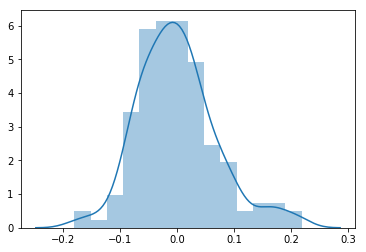

In [87]:
# Get the residual values and plot them, to make sure that we have normal distribution centered at mean.
res = y_train - y_train_pred
sns.distplot(res)

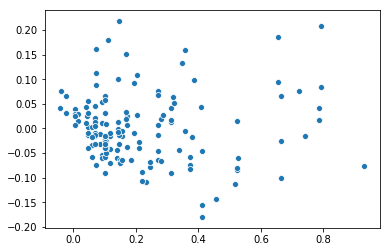

In [88]:
# Since there is no visual pattern of residuals and it is nicely centered around zero mean with normal
# distribution, we can stop our modelling here.
sns.scatterplot(y_train_pred, res)

## Prediction and Evaluation on the Test Set

In [89]:
# Do the scaling on the Test set now, This is to make sure that we do not do fit on the Test Set, 
# as we don't want our Model to learn anything from the Test Set data.
# Please note we should not do fit but directly use the Scaler created for Training Set.
# Just do transform on Test Set using this Scaler.
carPricing_test_df.loc[:,continousColumns] = scaler.transform(carPricing_test_df.loc[:, continousColumns])

carPricing_test_df[continousColumns].describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,0.363993,0.239439
std,0.271724,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,0.181845,0.233076
min,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,-0.027027,0.007763
25%,0.400000,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,0.216216,0.092342
50%,0.600000,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,0.563492,0.585859,0.125000,0.218750,0.346939,0.305556,0.351351,0.158991
75%,0.800000,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,0.746032,0.641414,0.150000,0.295833,0.540816,0.444444,0.459459,0.317243
max,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,0.888889,0.863636,1.000000,0.662500,1.000000,0.694444,0.810811,1.112855


In [90]:
X_train.columns

Index(['enginesize', 'peakrpm', 'aspiration_turbo', 'companyName_bmw',
       'companyName_buick', 'companyName_dodge', 'companyName_honda',
       'companyName_mitsubishi', 'companyName_plymouth',
       'companyName_porsche'],
      dtype='object')

In [91]:
# Create the Test X and y Test variables
X_test = carPricing_test_df[X_train.columns]
y_test = carPricing_test_df['price']

# Do target(y) prediction on the Test Data set.
X_test_sm = sm.add_constant(X_test)
y_test_pred = lm.predict(X_test_sm)

In [92]:
# Calculate the R-squared score for the Test Data set
test_r2_score = r2_score(y_test, y_test_pred)

print ('R-squared score on the test set: {0}'.format(test_r2_score))

R-squared score on the test set: 0.8995757227858654


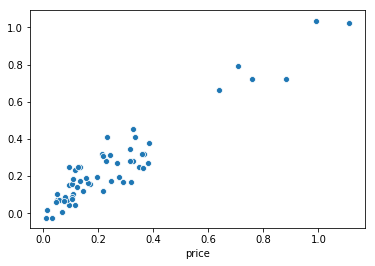

In [93]:
# Plot y_test and predicted y_test to get the feel of how similiar the prediction are made.
sns.scatterplot(y_test, y_test_pred)

In [94]:
y_test.count()

62

Text(0, 0.5, 'Views')

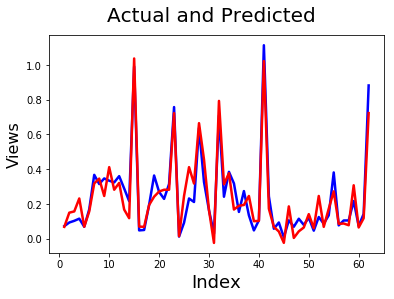

In [95]:
# Actual vs Predicted scatter plot for y variable.
c = [i for i in range(1, X_test.shape[0]+1,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=18)                              
plt.ylabel('Views', fontsize=16) 

## Below is our Regression Model Best Fit Line.
### This shows the variables which are significant in predicting the price of a car
### Their respective coefficient shows how much they effect the car price.
       
$ price = 0.9803*enginesize + 0.2221*peakrpm + 0.1040*aspiration_turbo + 0.2594*companyName_bmw + 
    0.2186*companyName_buick - 0.0976*companyName_dodge - 0.0851*companyName_honda - 
    0.1337*companyName_mitsubishi - 0.0877*companyName_plymouth + 0.1992*companyName_porsche -0.1274 $